## 0. Install and Import Modules

Ensure `torch` and `torchvision` are installed. If `pytorch3d` is not installed, install it using the following cell:

In [22]:
# import os
# import sys
# import torch
# need_pytorch3d=False
# try:
#     import pytorch3d
# except ModuleNotFoundError:
#     need_pytorch3d=True
# if need_pytorch3d:
#     if torch.__version__.startswith("1.13.") and sys.platform.startswith("linux"):
#         # We try to install PyTorch3D via a released wheel.
#         pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
#         version_str="".join([
#             f"py3{sys.version_info.minor}_cu",
#             torch.version.cuda.replace(".",""),
#             f"_pyt{pyt_version_str}"
#         ])
#         !pip install fvcore iopath
#         !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
#     else:
#         # We try to install PyTorch3D from source.
#         !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
#         !tar xzf 1.10.0.tar.gz
#         os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
#         !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [5]:
# # imports
# import numpy as np
# import torch
# from pytorch3d.transforms.so3 import (
#     so3_exp_map,
#     so3_relative_angle,
# )
# from pytorch3d.transforms.se3 import (
#     se3_exp_map,
#     se3_log_map,
# )

# import pytorch3d.transforms as transforms
    
# # add path for demo utils
# import sys
# import os
# sys.path.append(os.path.abspath(''))

# # set for reproducibility
# torch.manual_seed(42)
# if torch.cuda.is_available():
#     device = torch.device("cuda:0")
# else:
#     device = torch.device("cpu")
#     print("WARNING: CPU only, this will be slow!")

## **Data preparation**

In [ ]:
# # Load the matrices 
# T_o_cb_batch = np.load('')
# batch_size = T_o_cb_batch.shape[0]
# T_o_p_batch = np.load('')
# T_c_p_batch = np.load('')
# X_matrix = np.load('')
# X_batch = np.tile(X_matrix, [batch_size,1,1])

# # Load into torch tensor
# X_batch = torch.tensor(X_batch)
# T_o_p_batch = torch.tensor(T_o_p_batch)
# T_o_cb_batch = torch.tensor(T_o_cb_batch)
# T_c_p_batch = torch.tensor(T_c_p_batch)

In [13]:
# # # Load the matrices
# params_save_dir = '../data/post_optimization_data/'

# T_o_cb_batch = np.load(os.path.join(params_save_dir, 'T_o_cb_opti1_0314.npy'))[:150]
# # T_o_cb_batch[:,:3, 3] /= 1000 
# batch_size = T_o_cb_batch.shape[0]
# T_o_p_batch = np.load(os.path.join(params_save_dir, 'T_o_p_opti1_0314.npy'))[:150]
# # T_o_p_batch[:,:3, 3] /= 1000
# T_c_p_batch = np.load(os.path.join(params_save_dir, 'T_c_p_opti1_0314.npy'))[:150]
# # T_c_p_batch[:,:3, 3] /= 1000
# X_matrix = np.load('../params/hand_eye_X_0314.npy')
# # X_matrix[:3, 3] /= 1000
# # X_batch = np.tile(X_matrix, [batch_size,1,1])[:40]


# # Load into torch tensor
# X_batch = torch.tensor(X_matrix)
# T_o_p_batch = torch.tensor(T_o_p_batch)
# T_o_cb_batch = torch.tensor(T_o_cb_batch)
# T_c_p_batch = torch.tensor(T_c_p_batch)

In [14]:
# ## test
# from scipy.spatial.transform import Rotation as R

# batch_size = 10
# T_o_cb_batch = np.tile(np.eye(4), [batch_size,1,1])
# T_o_p_batch = np.tile(np.eye(4), [batch_size,1,1])
# T_c_p_batch = np.tile(np.eye(4), [batch_size,1,1])
# # X_matrix = np.hstack((np.vstack((R.random().as_matrix(), np.zeros([1,3]))), np.ones([4,1])))
# # X_batch = np.tile(X_matrix, [batch_size,1,1])
# # X_batch[:, :3, 3] = 2
# print(X_batch[:,:])
# X_batch = torch.tensor(X_batch)
# T_o_p_batch = torch.tensor(T_o_p_batch)
# T_o_cb_batch = torch.tensor(T_o_cb_batch)
# T_c_p_batch = torch.tensor(T_c_p_batch)

In [15]:
# # Create Transform3d objects from the batch of transformation matrices
# T_o_cb = transforms.Transform3d(matrix=T_o_cb_batch, device=device)
# X = transforms.Transform3d(matrix=X_batch, device=device)
# T_o_p = transforms.Transform3d(matrix=T_o_p_batch, device=device)
# T_c_p = transforms.Transform3d(matrix=T_c_p_batch, device=device)

# # cam_gt: the ground truth camera pose w.r.t the optical tracker cam_gt = T_o_p * (T_c_p)^-1
# cam_gt = T_o_cb.compose(X)

# # cam_real: the camera pose from initial hand-eye calibration cam_real = T_o_cb * X
# cam_real = T_o_p.compose(T_c_p.inverse())

## **Define optimization loss function**



In [16]:
# def camera_distance(hand_eye_real, hand_eye_gt):
#   '''
#   Calculate the l2 distance in se(3) manifold for the camera.
#   distance = sum||log(hand_eye_real*hand_eye_gt)||_2
#   '''

#   # Convert a batch of 4x4 transformation matrices transform to 
#   # a batch of 6-dimensional SE(3) logarithms of the SE(3) matrices
#   # print(hand_eye_real.compose(hand_eye_gt.inverse()).get_matrix())
#   tmp_matrix = hand_eye_real.compose(hand_eye_gt.inverse()).get_matrix()
#   vec = se3_log_map(tmp_matrix.permute(0,2,1)).sum(0)
#   # print(torch.norm(vec))

#   return torch.norm(vec)
  

# # camera_distance(cam_real, cam_gt)

## **Optimization**

In [21]:
# # Create Transform3d objects from the batch of transformation matrices
# T_o_cb = transforms.Transform3d(matrix=T_o_cb_batch, device=device)
# X = transforms.Transform3d(matrix=X_batch, device=device)
# T_o_p = transforms.Transform3d(matrix=T_o_p_batch, device=device)
# T_c_p = transforms.Transform3d(matrix=T_c_p_batch, device=device)

# # hand_eye_real: the hand-eye transformation from initial calibration X
# hand_eye_real_6D = se3_log_map(X.get_matrix().permute(0, 2, 1))
# hand_eye_real_6D.requires_grad = True


# # hand_eye_gt: the hand-eye transformation from the chain 
# # hand_eye_gt = (T_o_cb)^-1 * T_o_p * (T_c_p)^-1
# hand_eye_gt = T_o_cb.inverse().compose(T_o_p).compose(T_c_p.inverse())

# # init the optimizer
# optimizer = torch.optim.SGD([hand_eye_real_6D], lr=.001, momentum=0.9)

# # run the optimization
# n_iter = 2000  # fix the number of iterations
# for it in range(n_iter):
#     # re-init the optimizer gradients
#     optimizer.zero_grad()

#     # transform the 6d vector into 4x4 matrix
#     hand_eye_real = se3_exp_map(hand_eye_real_6D).permute(0, 2, 1)
#     hand_eye_real = transforms.Transform3d(matrix=hand_eye_real, device=device)

#     # compare the composed cameras with the ground truth relative cameras
#     # camera_distance corresponds to $d$ from the description
#     loss = \
#         camera_distance(hand_eye_real, hand_eye_gt)
#     # loss.requires_grad_(True)

#     # our loss function is the camera_distance
#     loss.backward()
    
#     # apply the gradients
#     optimizer.step()

#     # # plot and print status message
#     if it % 200==0 or it==n_iter-1:
#         status = 'iteration=%3d; camera_distance=%1.3e' % (it, loss)
#         print(status)
        
# print('Optimization finished.')


## **Pypose implementation**

In [6]:
# !pip install pypose
# !pip install seaborn

In [1]:
import os
import sys
import numpy as np
import torch, pypose as pp
from torch import nn
from scipy.spatial.transform import Rotation as R

/home/shc/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("WARNING: CPU only, this will be slow!")

## **Data Preparation**

In [52]:
# T_c_p_batch = np.load(os.path.join(params_save_dir, 'T_c_p_opti1_0314_.npy'))[:150]

# T_c_p = pp.mat2SE3(T_c_p_batch)
# # T_c_p @ pp.Inv(T_c_p_zed)

# print([T_c_p[i][:3].norm().item() for i in range(150)],'\n')
# # print(T_c_p_batch[0],'\n',T_c_p_batch_zed[0])

tensor(120.6716, dtype=torch.float64)
[133.39282481913557, 133.79329538571028, 133.34350857773907, 134.31885424563006, 136.18109359940948, 137.4929007434755, 136.81499020125665, 134.93793778891808, 133.96546721143366, 133.34427269539825, 134.25972966224109, 135.09003770541847, 135.6896263864084, 135.54885429865658, 137.01238500740527, 136.0754248091927, 133.29406428142144, 132.69130384297512, 133.69292663219252, 133.39103653680053, 133.04898992044846, 131.9790082093225, 132.59962585690738, 132.31696687167837, 132.55053151598722, 133.00239402620733, 133.32931893889446, 134.17363694422713, 134.6251574282835, 134.47064488693545, 134.1553194951729, 134.07082913100732, 135.30001162919947, 133.73140873742582, 133.04198916735353, 133.76341591887027, 134.58250032632117, 135.6867819146406, 135.18097307072722, 135.96203927249866, 137.2119136754774, 136.02623541022805, 136.8287946813297, 136.69829890397583, 137.24082492103682, 136.30147985382905, 134.50121631091784, 135.31626049537982, 136.126885

/tmp/ipykernel_12365/3195425166.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(displacement)


<Axes: ylabel='Density'>

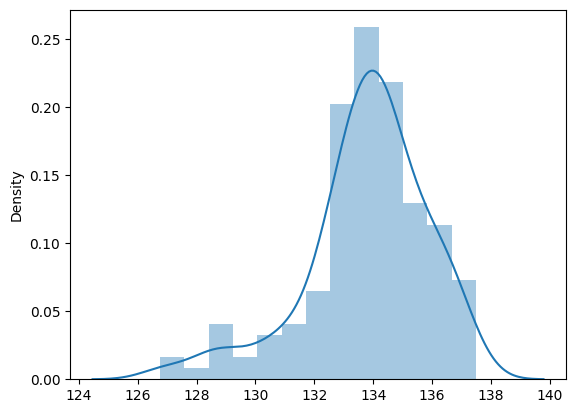

In [124]:
# # Load the matrices
params_save_dir = '../data/post_optimization_data/'
num_poses = 150
T_o_cb_batch = np.load(os.path.join(params_save_dir, 'T_o_cb_opti1_0314.npy'))[:num_poses]
# T_o_cb_batch[:,:3, 3] /= 1000 
batch_size = T_o_cb_batch.shape[0]
T_o_p_batch = np.load(os.path.join(params_save_dir, 'T_o_p_opti1_0314.npy'))[:num_poses]
# T_o_p_batch[:,:3, 3] /= 1000
T_c_p_batch = np.load(os.path.join(params_save_dir, 'T_c_p_opti1_0314_.npy'))[:num_poses]
# T_c_p_batch[:,:3, 3] /= 1000
X_matrix = np.load('../params/hand_eye_X_0314.npy')
# X_matrix[:3, 3] /= 1000
# X_batch = np.tile(X_matrix, [batch_size,1,1])[:40]

# convert to pp tensor
X = pp.mat2SE3(X_matrix)
T_o_p = pp.mat2SE3(T_o_p_batch)
T_o_cb = pp.mat2SE3(T_o_cb_batch)
T_c_p = pp.mat2SE3(T_c_p_batch)
# print(np.linalg.norm(X_batch[1, :3,3]))
print(X[:3].norm())

hand_eye_gt = pp.Inv(T_o_cb) * T_o_p * pp.Inv(T_c_p)
displacement = [hand_eye_gt[i][:3].norm().item() for i in range(num_poses)]
print(displacement,'\n')
print(hand_eye_gt[1].matrix())
import seaborn
seaborn.distplot(displacement)

In [33]:
# # test
# batch_size = 800
# T_o_cb_batch = np.tile(np.eye(4), [batch_size,1,1])
# T_o_p_batch = np.tile(np.eye(4), [batch_size,1,1])
# T_c_p_batch = np.tile(np.eye(4), [batch_size,1,1])
# X_matrix = np.hstack((np.vstack((R.random().as_matrix(), np.zeros([1,3]))), np.ones([4,1])))
# X_batch = np.tile(X_matrix, [batch_size,1,1])
# X_batch[:, :3, 3] = 2.5

# print(X_batch[1, :,:])

# # convert to pp tensor
# X = pp.mat2SE3(X_batch)
# T_o_p = pp.mat2SE3(T_o_p_batch)
# T_o_cb = pp.mat2SE3(T_o_cb_batch)
# T_c_p = pp.mat2SE3(T_c_p_batch)
# # print(X_batch[1,...])
# # print(X_batch @ pp.Inv(X_batch))

## **Optimization**

In [125]:
class CamDis(nn.Module):
    def __init__(self, hand_eye_real_6D):
        super().__init__()
        self.real = pp.Parameter(hand_eye_real_6D)

    def forward(self, input):
        # input hand_eye_gt
        hand_eye_real = self.real.Exp()
        # tmp_quats = hand_eye_real * pp.Inv(input) #?????????????????
        tmp_quats = pp.Inv(hand_eye_real) * input 
        vec = tmp_quats.Log()
        t = vec[:, :3]
        t = torch.norm(t, dim=1)
        rot_vec = vec[:, 3:]
        rot_vec = torch.norm(rot_vec, dim=1)
        # return t.mean() + rot_vec.mean() #+ (X.to(device)[:3] - hand_eye_real[:3]).norm()
        # return t.norm() + (X[:3] - hand_eye_real[:3]).norm()
        # print(vec)
        return vec

In [126]:
# hand_eye_real: the hand-eye transformation from initial calibration X

hand_eye_real = X.clone().detach()
hand_eye_real_6D = hand_eye_real.Log()
# hand_eye_gt: the hand-eye transformation from the chain 
# hand_eye_gt = (T_o_cb)^-1 * T_o_p * (T_c_p)^-1
hand_eye_gt = pp.Inv(T_o_cb) * T_o_p * pp.Inv(T_c_p)
# hand_eye_inv_gt = T_c_p @ pp.Inv(T_o_p) @ T_o_cb
hand_eye_gt = hand_eye_gt.clone().detach()


# init the optimizer
camera_distance = CamDis(hand_eye_real_6D).to(device)
# input = hand_eye_gt.to(device)
input = hand_eye_gt.to(device)
# strategy = pp.optim.strategy.Adaptive(damping=1e-6)
strategy = pp.optim.strategy.TrustRegion(radius=1e3)
optimizer = pp.optim.LM(camera_distance, strategy=strategy)
# run the optimization
n_iter = 500  # fix the number of iterations1
for it in range(n_iter):
    loss = optimizer.step(input)
    # print(loss)
    # # plot and print status message
    if it % 100==0 or it==n_iter-1:
        status = 'iteration=%3d; camera_distance=%1.3e' % (it, loss-5643)
        print(status)
        # print(camera_distance.real.Exp())
    if loss < 1e-4:
        print('Early Stopping with loss:', loss.item())
        break
res = camera_distance.real.Exp()
print('The final result:\n', res)
print('Optimization finished.')


/home/shc/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <slot wrapper '__getitem__' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \
/home/shc/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <method 'reshape' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \
/home/shc/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <method 'view' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \


iteration=  0; camera_distance=4.947e-01
iteration=100; camera_distance=-1.011e+00
iteration=200; camera_distance=-1.011e+00
iteration=300; camera_distance=-1.011e+00
iteration=400; camera_distance=-1.011e+00
iteration=499; camera_distance=-1.011e+00
The final result:
 SE3Type LieTensor:
LieTensor([ 12.5056, 107.5742,  78.3203,  -0.3634,   0.4600,   0.5072,   0.6317],
          device='cuda:0', dtype=torch.float64, grad_fn=<AliasBackward0>)
Optimization finished.


In [127]:
X = X.to(device)

print('initial X:\n', X)
print('optimization result:\n', res)
print(X[:3].norm().item())
print(res[:3].norm().item())


initial X:
 SE3Type LieTensor:
LieTensor([ 7.3069, 98.1913, 69.7617, -0.3618,  0.4588,  0.4927,  0.6449],
          device='cuda:0', dtype=torch.float64)
optimization result:
 SE3Type LieTensor:
LieTensor([ 12.5056, 107.5742,  78.3203,  -0.3634,   0.4600,   0.5072,   0.6317],
          device='cuda:0', dtype=torch.float64, grad_fn=<AliasBackward0>)
120.67156565525889
133.65133184542614


In [109]:

print(pp.matrix(X),'\n', pp.matrix(pp.Inv(res))* pp.matrix(X))
print(res.matrix())
# print(input[10].matrix())

tensor([[ 9.3572e-02, -9.6743e-01,  2.3523e-01,  7.3069e+00],
        [ 3.0347e-01,  2.5273e-01,  9.1871e-01,  9.8191e+01],
        [-9.4824e-01, -1.4582e-02,  3.1723e-01,  6.9762e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0',
       dtype=torch.float64) 
 tensor([[ 5.8164e-03, -2.9658e-01, -2.2342e-01,  2.9691e+02],
        [-2.9593e-01,  5.5943e-02,  7.0047e-03, -1.1993e+03],
        [-2.0158e-01, -1.3499e-02,  9.9202e-02, -8.8414e+03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0',
       dtype=torch.float64, grad_fn=<MulBackward0>)
tensor([[ 6.2160e-02, -9.7516e-01,  2.1258e-01,  1.2506e+01],
        [ 3.0656e-01,  2.2135e-01,  9.2575e-01,  1.0757e+02],
        [-9.4982e-01,  7.6245e-03,  3.1271e-01,  7.8320e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0',
       dtype=torch.float64, grad_fn=<TransposeBackward0>)


In [110]:
opX = res.matrix().to('cpu').detach().numpy()
# opX = np.array([[ 6.5548e-02, -9.7166e-01,  2.2711e-01,  9.7073e+00],
#         [ 3.0286e-01,  2.3624e-01,  9.2329e-01,  1.0783e+02],
#         [-9.5078e-01,  8.2638e-03,  3.0977e-01,  7.9392e+01],
#         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
# opX[:3, 3] *= 1000
np.save('/home/shc/Desktop/data/0314/handeye_1/new_X.npy', opX)